In [366]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# configs
warnings.filterwarnings('ignore')

In [367]:
data= pd.read_csv('global-data-on-sustainable-energy.csv')

#### Data Quality Report

##### Continuous features report 

In [368]:
def build_continuous_features_report(data_df):

    """Build tabular report for continuous features"""

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    contin_feat_names = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[contin_feat_names]

    report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df


In [369]:
# build continuous features report
con_report_df = build_continuous_features_report(data)
con_report_df

,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Year,3649,0.000000,21,2000.000000,2005.000000,2.010038e+03,2.010000e+03,2.015000e+03,2.020000e+03,6.054228e+00
Access to electricity (% of population),3649,0.274048,2040,1.252269,59.800890,7.893370e+01,9.836157e+01,1.000000e+02,1.000000e+02,3.027554e+01
Access to clean fuels for cooking,3649,4.631406,896,0.000000,23.175000,6.325529e+01,8.315000e+01,1.000000e+02,1.000000e+02,3.904366e+01
Renewable-electricity-generating-capacity-per-capita,3649,25.513839,2110,0.000000,3.540000,1.131375e+02,3.291000e+01,1.122100e+02,3.060190e+03,2.441673e+02
Financial flows to developing countries (US $),3649,57.248561,1017,0.000000,260000.000000,9.422400e+07,5.665000e+06,5.534750e+07,5.202310e+09,2.981544e+08
Renewable energy share in the total final energy consumption (%),3649,5.316525,2587,0.000000,6.515000,3.263816e+01,2.330000e+01,5.524500e+01,9.604000e+01,2.989490e+01
Electricity from fossil fuels (TWh),3649,0.575500,1859,0.000000,0.290000,7.036500e+01,2.970000e+00,2.683750e+01,5.184130e+03,3.480519e+02
Electricity from nuclear (TWh),3649,3.453001,547,0.000000,0.000000,1.345019e+01,0.000000e+00,0.000000e+00,8.094100e+02,7.300662e+01
Electricity from renewables (TWh),3649,0.575500,1533,0.000000,0.040000,2.396801e+01,1.470000e+00,9.600000e+00,2.184940e+03,1.044311e+02
Low-carbon electricity (% electricity),3649,1.151000,2647,0.000000,2.877847,3.680118e+01,2.786507e+01,6.440379e+01,1.000000e+02,3.431488e+01


In [370]:
print("categorical features are :")
data.select_dtypes(exclude="number").columns

categorical features are :


Index(['Entity', 'Density\n(P/Km2)'], dtype='object')

##### Categorical features Report

In [371]:
def build_categorical_features_report(data_df):

    """Build tabular report for categorical features"""

    def _mode(df):
        return df.apply(lambda ft: ",".join(ft.mode().to_list()))

    def _mode_freq(df):
        return df.apply(lambda ft: ft.value_counts()[ft.mode()].sum())

    def _second_mode(df):
        return df.apply(lambda ft: ",".join(ft[~ft.isin(ft.mode())].mode().to_list()))

    def _second_mode_freq(df):
        return df.apply(
            lambda ft: ft[~ft.isin(ft.mode())]
            .value_counts()[ft[~ft.isin(ft.mode())].mode()]
            .sum()
        )

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    cat_feat_names = data_df.select_dtypes(exclude="number").columns
    cat_data_df = data_df[cat_feat_names]

    report_df = pd.DataFrame(index=cat_feat_names, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(cat_data_df)

    return report_df


In [372]:
# build categorical feature report
cat_report_df = build_categorical_features_report(data)
cat_report_df

,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Entity,3649,0.000000,176,"Afghanistan,Albania,Algeria,Angola,Antigua and...",3612,98.986024,"Montenegro,Serbia",28,0.767334
Density\n(P/Km2),3649,0.027405,124,25,147,4.028501,18,113,3.096739


#### Data Quality Plan

#### Data Preparation

Convert the types to the desired ones

In [373]:
def remove_functuation(density):
    return density.replace(',','')
data['Entity']=data['Entity'].astype(str)
data['Density\\n(P/Km2)']=data['Density\\n(P/Km2)'].astype(str)
data['Density\\n(P/Km2)']=data['Density\\n(P/Km2)'].apply(remove_functuation)
data['Density\\n(P/Km2)']=data['Density\\n(P/Km2)'].astype(float)

##### Handling missing values

In [374]:
#Handling missing values in continuous features
missing_con_cols = con_report_df.query("`Miss %` > 0.0").index
#print(missing_con_cols)
feature_with_null=[column for column in missing_con_cols if column not in ['Year','Primary energy consumption per capita (kWh/person)']]
#print(feature_with_null)
# Replacing values with mean
data.fillna(data[feature_with_null].mean(),inplace=True)

In [375]:
# Handling missing values in categorical features
cat_missing = cat_report_df.query("`Miss %` > 0").index


cat_fillna_vals = data[cat_missing].mode().squeeze()
data = data.fillna(cat_fillna_vals)

In [376]:
data.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

In [377]:
data.isnull().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

In [378]:
# Check for duplicate rows
num_duplicates = data.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


##### There are no duplicate rows in our dataset 

#### Handling Outliers

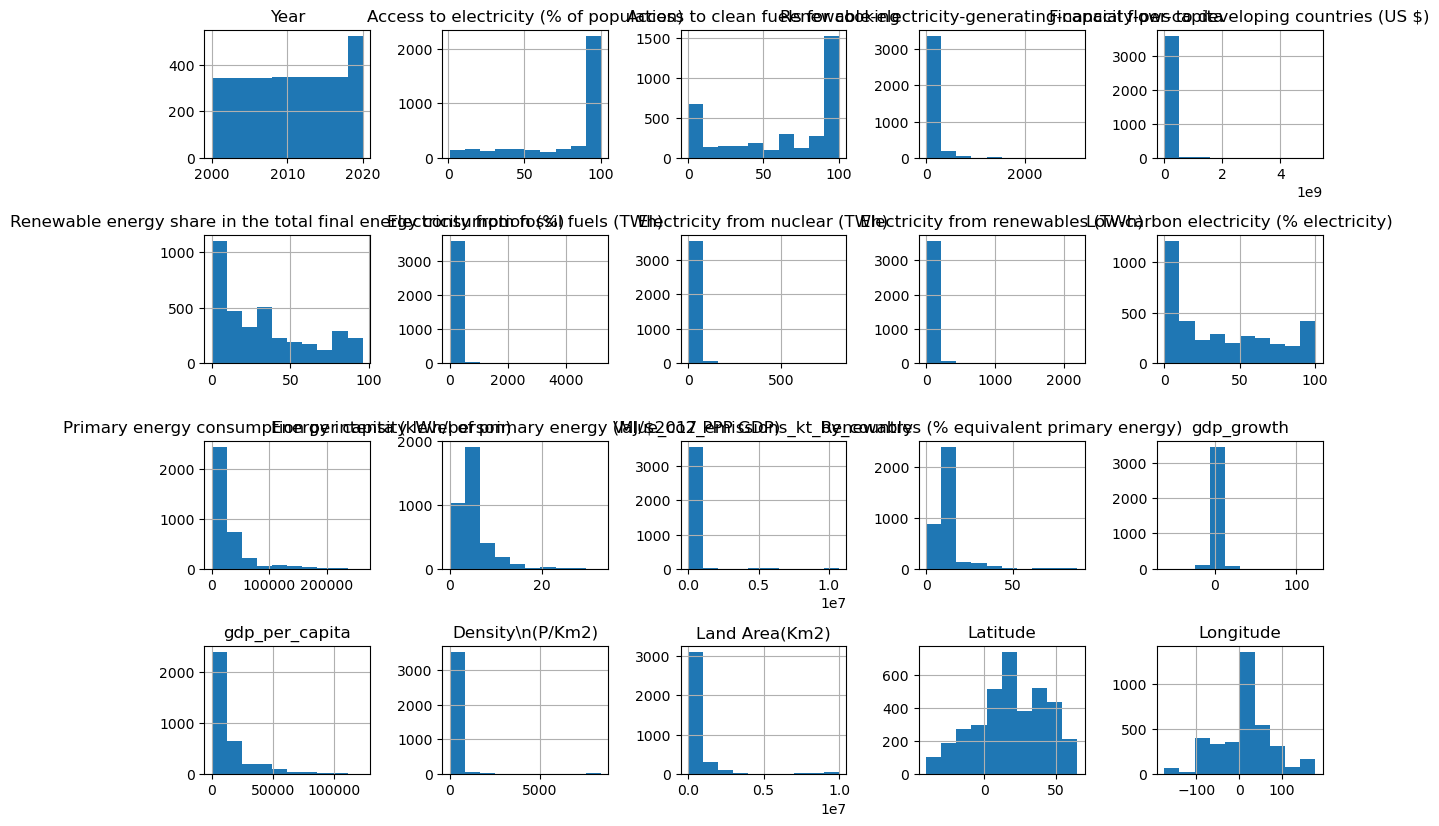

In [379]:
# Visualize histograms for each numerical column
data.hist(figsize=(12, 10), layout=(5, 5))  # Adjust layout based on the number of columns
plt.tight_layout() 
plt.show()

##### Plot heatmap

In [380]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix
#print(correlation_matrix)

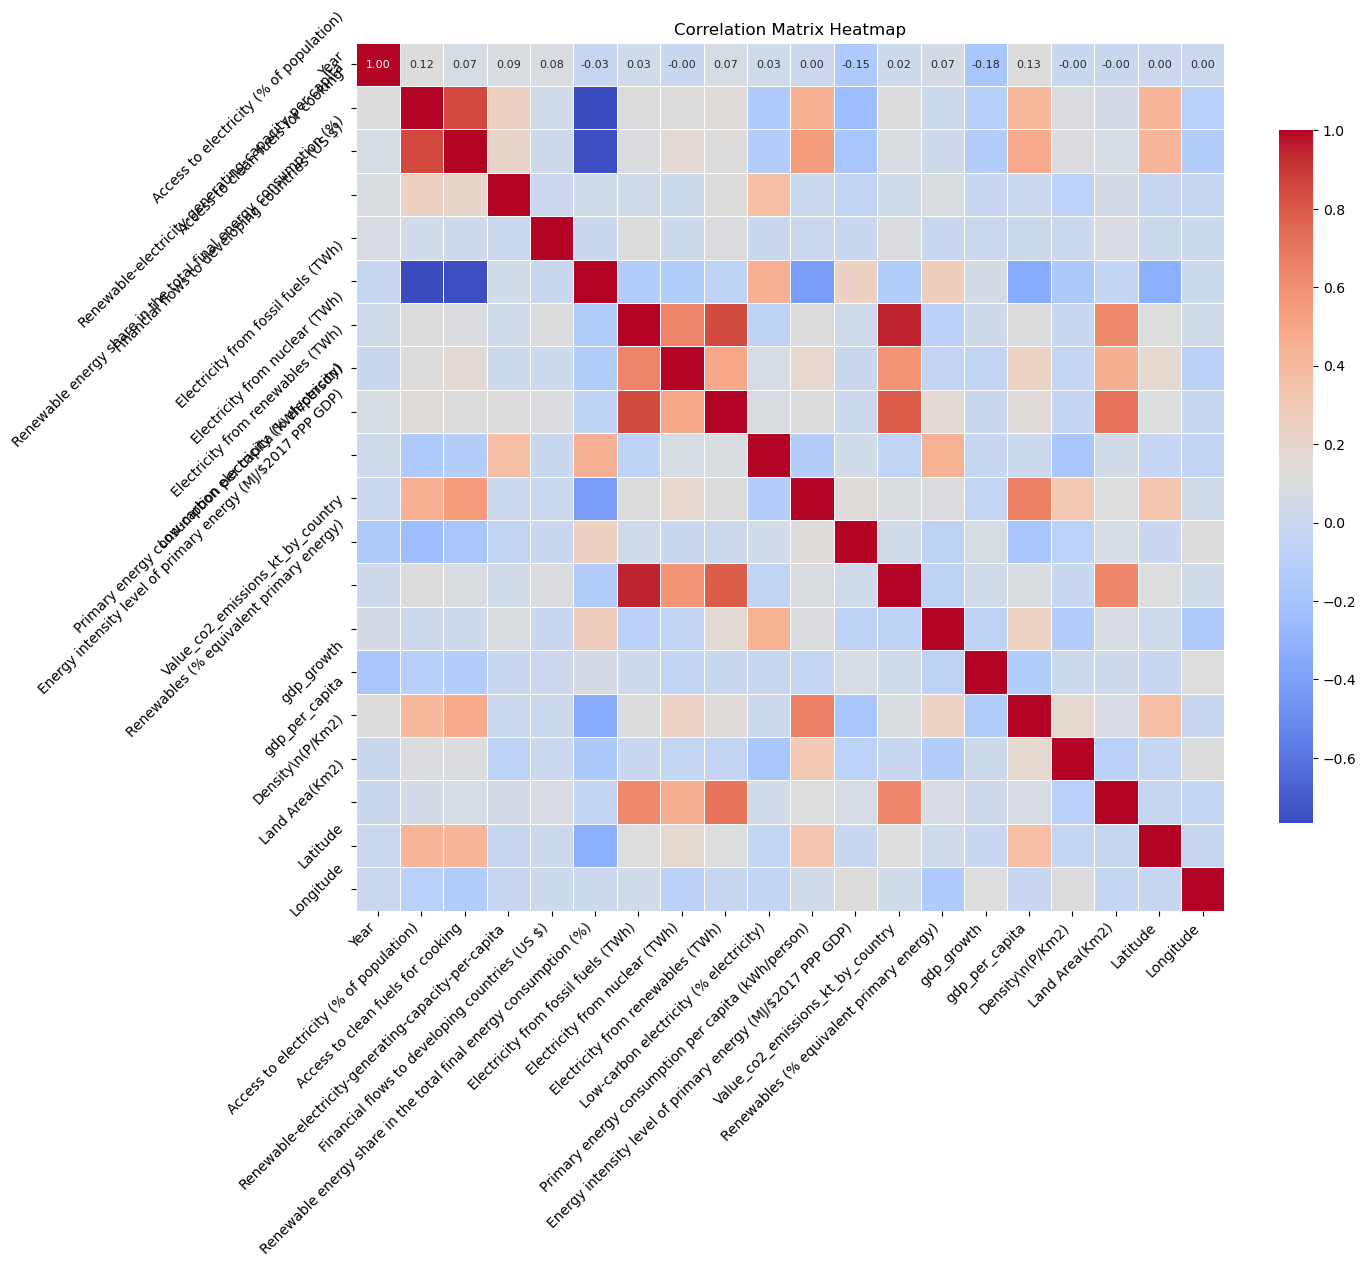

In [381]:
#heatmap
plt.figure(figsize=(14, 12))
# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
            cbar_kws={"shrink": .75}, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
            annot_kws={"size": 8}, square=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.title('Correlation Matrix Heatmap')
plt.show()